# Challenge 3

Topic: Linear Splitting and Regression<br>
Date: 10/10/2016 <br>
Name: Travis James <br>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf

%matplotlib inline

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/travishjames/sf16_ds4/master/challenges/03-linear_splitting/2013_movies.csv?token=AUIhttWX3tCt4ZXyRsnA2381OYfd7iHZks5YBUkKwA%3D%3D')

**Challenge 3.1**

In [38]:
df.shape

(100, 7)

In [126]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1


In [97]:
df = df.dropna()

In [98]:
df["Constant"] = 1

/Users/travisjames/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [163]:
y = df['DomesticTotalGross']
X = df['Constant']

In [164]:
model1 = smf.OLS(y, X)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 10 Oct 2016   Prob (F-statistic):                nan
Time:                        17:44:23   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    1.035e+08   9.43e+06     10.975      0.000      8.48e+07  1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

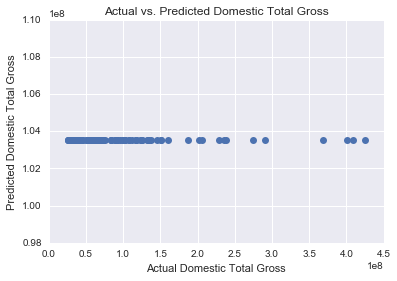

In [188]:
y_pred = fit1.predict(X)
plt.plot(y, y_pred, 'o')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

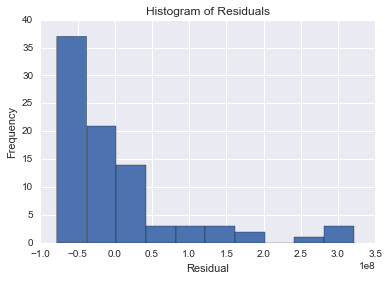

In [193]:
residuals = y - y_pred
plt.hist(residuals)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

As we can see, just the constant term does not do a very good job at predicting the target variable of Domestic Total Gross Revenue. This is because using simply a constant as our feature to predict a continuous target actually yields the mean of the target data. Thus, we are predicting the mean for every observation of Y. This is why our plot of predicted vs. actualy values yields a straight line across, because the predicted values are all the mean of Domestic Total Gross.

The Residuals are distributed more like a gamma or exponential distribution, rather than the normal distribution we would hope for.

**Challenge 3.2**

In [103]:
X2 = df[['Constant', 'Budget']]

In [104]:
X2.head()

,Constant,Budget
0,1,130000000.0
1,1,200000000.0
2,1,150000000.0
3,1,76000000.0
4,1,225000000.0


In [105]:
model2 = smf.OLS(y, X2)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        15:35:11   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    4.443e+07    1.3e+07      3.418      0.001      1.86e+07  7.03e+07
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

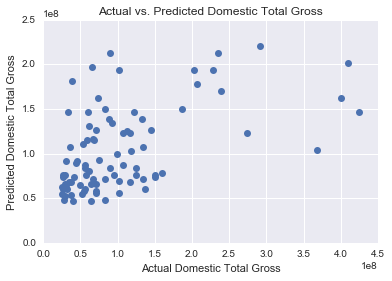

In [170]:
y_pred2 = fit2.predict(X2)
plt.plot(y, y_pred2, 'o')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

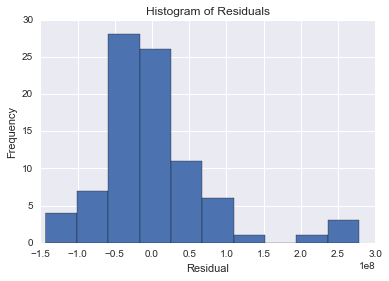

In [192]:
residuals2 = y - y_pred2
plt.hist(residuals2)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

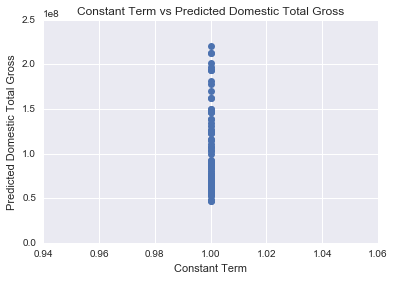

In [173]:
plt.plot(df['Constant'], y_pred2, 'o')
plt.xlabel('Constant Term')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Constant Term vs Predicted Domestic Total Gross');

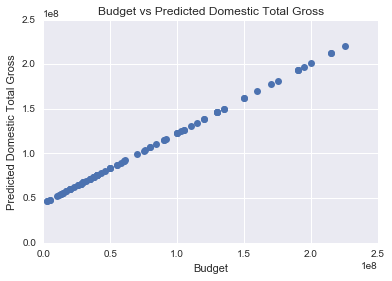

In [174]:
plt.plot(df['Budget'], y_pred2, 'o')
plt.xlabel('Budget')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Budget vs Predicted Domestic Total Gross');

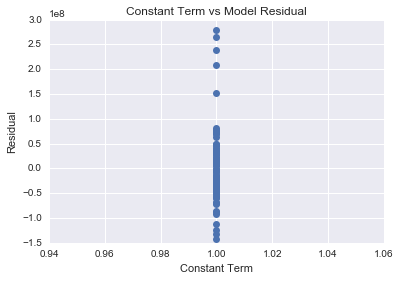

In [175]:
plt.plot(df['Constant'], residuals2, 'o')
plt.xlabel('Constant Term')
plt.ylabel('Residual')
plt.title('Constant Term vs Model Residual');

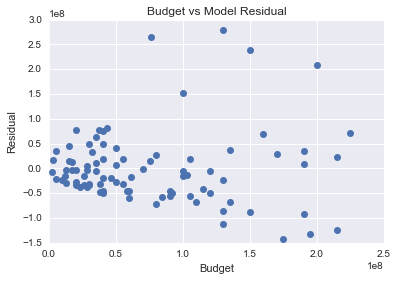

In [176]:
plt.plot(df['Budget'], residuals2, 'o')
plt.xlabel('Budget')
plt.ylabel('Residual')
plt.title('Budget vs Model Residual');

In the model with one continuous feature, we are fitting an exact linear relationship between the feature and the target. This is because the constant has zero variation, and with only one feature we are assuming a one to one relationship between the two continuous variables. This is why we have a perfect linear fit between the predicted Domestic Total Gross values and the Budget feature.

**Challenge 3.3**

In [127]:
X3 = df[['Constant', 'Budget', 'Rating']]

In [178]:
X3 = pd.get_dummies(X3, drop_first = True)

In [179]:
model3 = smf.OLS(y, X3)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           3.25e-06
Time:                        18:02:48   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Constant      3.556e+07   1.13e+07      3.148      0.002      1.31e+07   5.8e+07
Budget           0.7806      0.156      5.005      0.000         0.470     1.091
Rating_PG     2.217e+07   1.68e+07      1.319      0.191     -1.13e+07  5.56e+07
Rating_PG-13  5.061e+06   1.25e+07      0.404      0.687     -1.98e+07     3e+07
Rating_R      8.329e+06   1.19e+07      0.701      0.485     -1.53e+07  3.19e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                     7.22e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

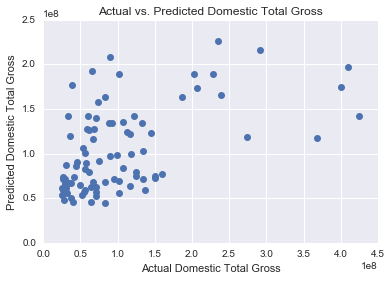

In [189]:
y_pred3 = fit3.predict(X3)
plt.plot(y, y_pred3, 'o')
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs. Predicted Domestic Total Gross');

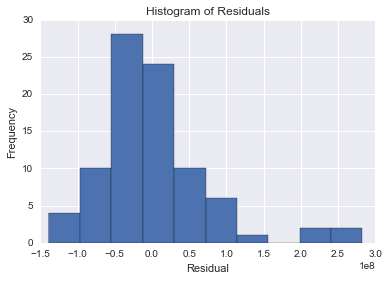

In [191]:
residuals3 = y - y_pred3
plt.hist(residuals3)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

This model actually has a worse R-squared than the previous model with no categorical feature. Thus, we may be overfitting our model, and simply adding noise that is forcing our R-squared down. Both models have more normally distributed residuals than the first model with just a constant term.

**Challenge 3.4**

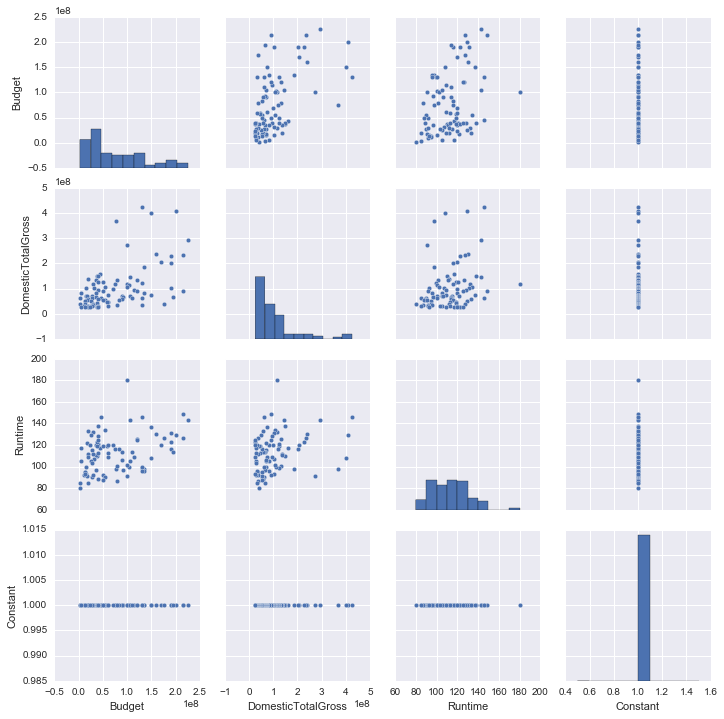

In [134]:
sns.pairplot(df);

In [149]:
X4 = df[['Budget', 'Rating', 'Runtime']]
X4 = pd.get_dummies(X4)

In [150]:
model4 = smf.OLS(y, X4)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           6.38e-06
Time:                        17:28:06   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Budget           0.6957      0.172      4.054      0.000         0.354     1.037
Runtime       6.254e+05   5.33e+05      1.173      0.244     -4.35e+05  1.69e+06
Rating_PG      3.09e+06   5.29e+07      0.058      0.954     -1.02e+08  1.08e+08
Rating_PG-13 -2.438e+07   5.87e+07     -0.415      0.679     -1.41e+08  9.24e+07
Rating_R     -2.281e+07   5.87e+07     -0.389      0.698      -1.4e+08  9.39e+07
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     1.13e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After plotting the pairwise comparisons between the variables, there did not seem to be a strong non-linear relationship between Domestic Total Gross and any of the available features. Runtime did appear somewhat correlated to Domestic Total Gross however, so I included it in the next version of my model. Both the R-squared and adjusted R-squared increased, suggesting that the model fit has improved, albeit with a fairly insignificant coefficient on Runtime with a p-value of 0.244.

**Challenge 3.5**

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.25)

In [184]:
model5 = smf.OLS(y_train, X_train)
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     4.270
Date:                Mon, 10 Oct 2016   Prob (F-statistic):            0.00417
Time:                        18:08:08   Log-Likelihood:                -1264.2
No. Observations:                  65   AIC:                             2538.
Df Residuals:                      60   BIC:                             2549.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Budget           0.5202      0.193      2.690      0.009         0.133     0.907
Runtime       3.055e+05   6.26e+05      0.488      0.627     -9.47e+05  1.56e+06
Rating_PG     6.183e+07   6.27e+07      0.986      0.328     -6.36e+07  1.87e+08
Rating_PG-13  1.103e+07   6.95e+07      0.159      0.874     -1.28e+08   1.5e+08
Rating_R      2.222e+07   6.78e+07      0.328      0.744     -1.13e+08  1.58e+08
==============================================================================
Omnibus:                       25.374   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.554
Skew:                           1.423   Prob(JB):                     9.48e-10
Kurtosis:                       5.691   Cond. No.                     1.21e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
y_pred_test = fit5.predict(X_test)

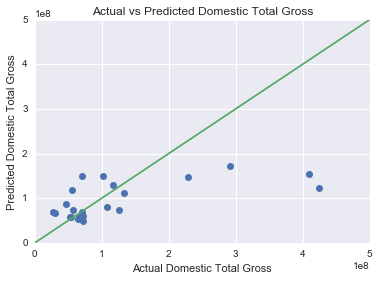

In [194]:
plt.plot(y_test, y_pred_test, 'o')
line = np.linspace(0,10e8)
plt.xlim([0,5e8])
plt.ylim([0,5e8])
plt.plot(line,line)
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Actual vs Predicted Domestic Total Gross');

Clearly the model is not very well specified, as the predicted vs. actualy values of Domestic Total Gross do not follow the 45 degree line very closely. This is most likely a result of a lack of features and a relatively small sample size. If both could be expanded upon, I'm confident the model could be improved in terms of it's predictive accuracy.